# Nombres:
Lopez Rodriguez Jesus Inocencio --
Alaluna Godinez Mauricio Antonio

# Comentarios sobre el modelo:
La gráfica del Modelo de Regresión Lineal Múltiple es parecido al visto en el modelo SVM, solo que en un entorno tridimensional. Es díficil trazar la predicción debido a que no hay tantos datos dispersos y abundantes, por ello este modelo su predicción no llega al 50% y no lo consideramos óptimo para nuestra database.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv("BreastCancerDataSet_LimpiezaCompletada.csv",sep=';')
dataframe.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,2,3,7,1,2,3,1,2,2
1,0,3,3,5,1,2,2,2,3,2
2,0,3,3,5,1,2,2,1,2,2
3,0,5,2,4,1,2,2,2,1,2
4,0,3,3,1,1,2,2,2,4,2
5,0,5,2,4,1,2,2,1,2,2
6,0,4,3,6,1,2,2,1,2,2
7,0,5,2,5,1,2,1,1,2,2
8,0,3,3,11,1,2,2,1,2,2
9,0,3,3,5,1,2,2,2,1,2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = dataframe.drop(columns=['Class'])  
y = dataframe['Class']  

X = X[['age', 'tumor-size']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


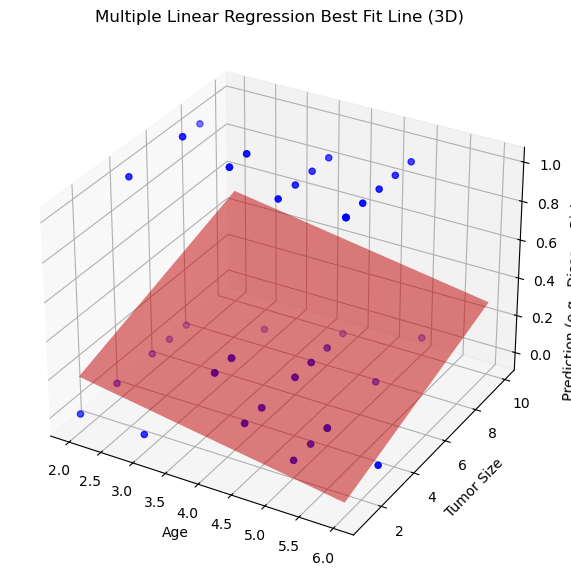

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['age'], X_test['tumor-size'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['age'].min(), X_test['age'].max(), 100)
x2_range = np.linspace(X_test['tumor-size'].min(), X_test['tumor-size'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

# Graficar la superficie ajustada
ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Age')
ax.set_ylabel('Tumor Size')
ax.set_zlabel('Prediction (e.g., Disease Risk or Outcome)')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)